2D Simple

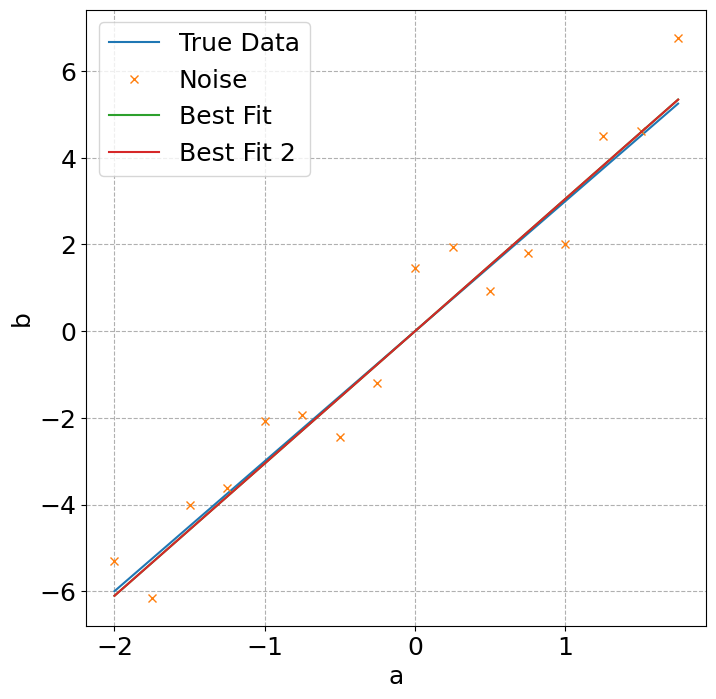

U
[[-0.43133109]
 [-0.37741471]
 [-0.32349832]
 [-0.26958193]
 [-0.21566555]
 [-0.16174916]
 [-0.10783277]
 [-0.05391639]
 [ 0.        ]
 [ 0.05391639]
 [ 0.10783277]
 [ 0.16174916]
 [ 0.21566555]
 [ 0.26958193]
 [ 0.32349832]
 [ 0.37741471]]
S
[4.63680925]
Vt
[[1.]]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})

x = 3
a = np.arange(-2,2,0.25)
a = a.reshape(-1,1)
b = x*a + np.random.randn(*a.shape) # Creating noise

plt.plot(a, x*a, label="True Data")
plt.plot(a,b,'x', label="Noise")

U, S, Vt = np.linalg.svd(a, full_matrices=False)
xtilde = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde_2 = np.linalg.pinv(a) @ b

plt.plot(a, xtilde * a, label="Best Fit")
plt.plot(a, xtilde_2 * a, label="Best Fit 2")

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle="--")
plt.legend()
plt.show()

print("U")
print(U)
print("S")
print(S)
print("Vt")
print(Vt)

2D Data Simple

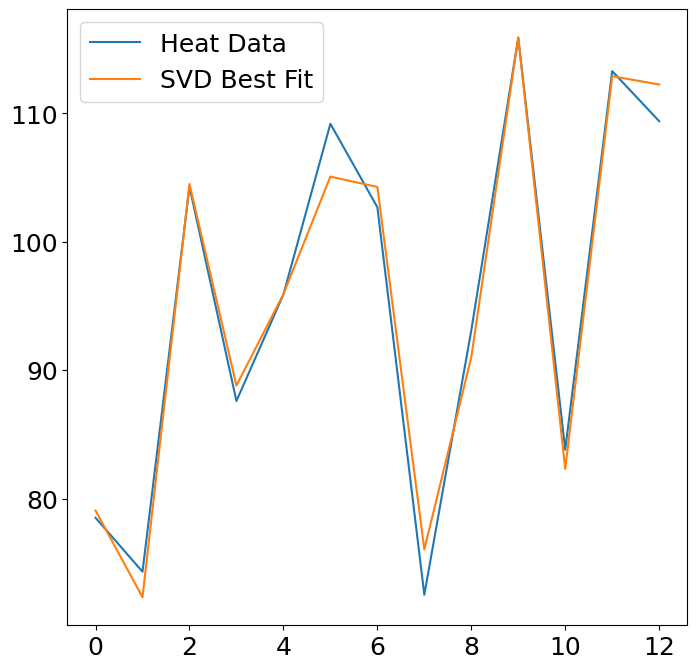

U
[[-0.25198143  0.49575166 -0.24094445  0.33739303]
 [-0.25021671  0.39897789  0.16228266  0.18958829]
 [-0.28296417 -0.14598273 -0.1478218  -0.0196681 ]
 [-0.24607722  0.31826717 -0.23308515 -0.14452909]
 [-0.29284214  0.02490943 -0.15631779  0.48051738]
 [-0.28455587 -0.11627573 -0.12812606 -0.07374165]
 [-0.31379477 -0.38729964  0.31564043  0.1243492 ]
 [-0.24623151  0.30360648  0.37686612 -0.29484915]
 [-0.28358624 -0.09629558  0.31575462  0.02325539]
 [-0.26337581 -0.02938163 -0.497746   -0.60068283]
 [-0.25980212  0.13430501  0.43516411 -0.31372155]
 [-0.30513498 -0.29969568 -0.09765536  0.00429493]
 [-0.31153827 -0.31326044 -0.10278724  0.17439289]]
S
[211.33694119  77.23560956  28.45965697  10.26673399]
Vt
[[-0.12790429 -0.83980147 -0.19844687 -0.48886892]
 [-0.04276717 -0.50916305  0.07212349  0.85657584]
 [-0.64590387 -0.01812007  0.75571522 -0.10665064]
 [-0.75141177  0.18750504 -0.61992867  0.12613746]]


In [26]:
# Setting up test data
A = np.loadtxt(os.path.join('hald_ingredients.csv'), delimiter=',')
b = np.loadtxt(os.path.join('hald_heat.csv'), delimiter=',')

U, S, Vt = np.linalg.svd(A, full_matrices=False)
x = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, label="Heat Data")
plt.plot(A @ x, label="SVD Best Fit" )
plt.legend()
plt.show()

print("U")
print(U)
print("S")
print(S)
print("Vt")
print(Vt)

Multi-Dimensional Data

A
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 1.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 1.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 1.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.0000e+00]]
A_nopad
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


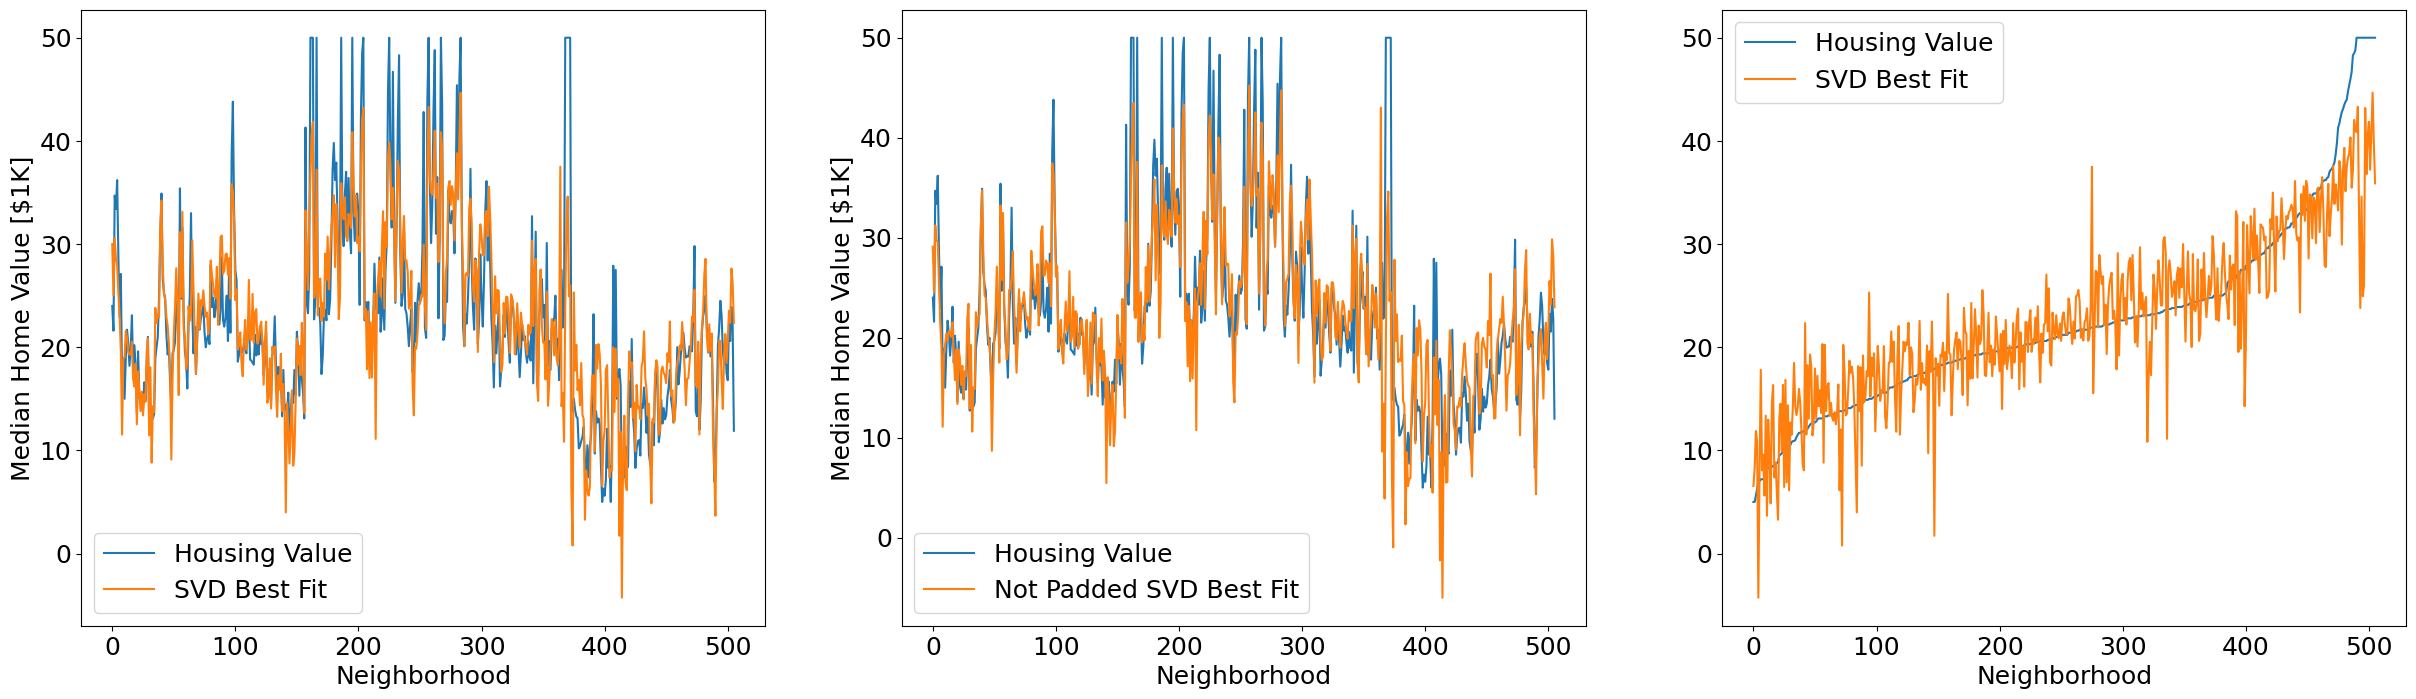

In [67]:
plt.rcParams['figure.figsize'] = [30,8]
plt.rcParams.update({'font.size': 18})
H = np.loadtxt(os.path.join('housing.data')) # Boston House Values (506 houses)
b = H[:,-1] # Housing Value in $1000
A = H[:,:-1] # Other house factors (13)

A_nopad = A
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values=1)

print("A")
print(A)
print("A_nopad")
print(A_nopad)

U, S, Vt, = np.linalg.svd(A, full_matrices=False)
x = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

U, S, Vt, = np.linalg.svd(A_nopad, full_matrices=False)
x_nopad = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()

ax1 = fig.add_subplot(131)

plt.plot(b, label="Housing Value")
plt.plot(A@x, label="SVD Best Fit")
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1K]')
plt.legend()

ax2 = fig.add_subplot(132)

plt.plot(b, label="Housing Value")
plt.plot(A_nopad@x_nopad, label="Not Padded SVD Best Fit")
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1K]')
plt.legend()

ax3 = fig.add_subplot(133)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind]
plt.plot(b, label='Housing Value')
plt.plot(A[sort_ind,:]@x, label="SVD Best Fit")
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

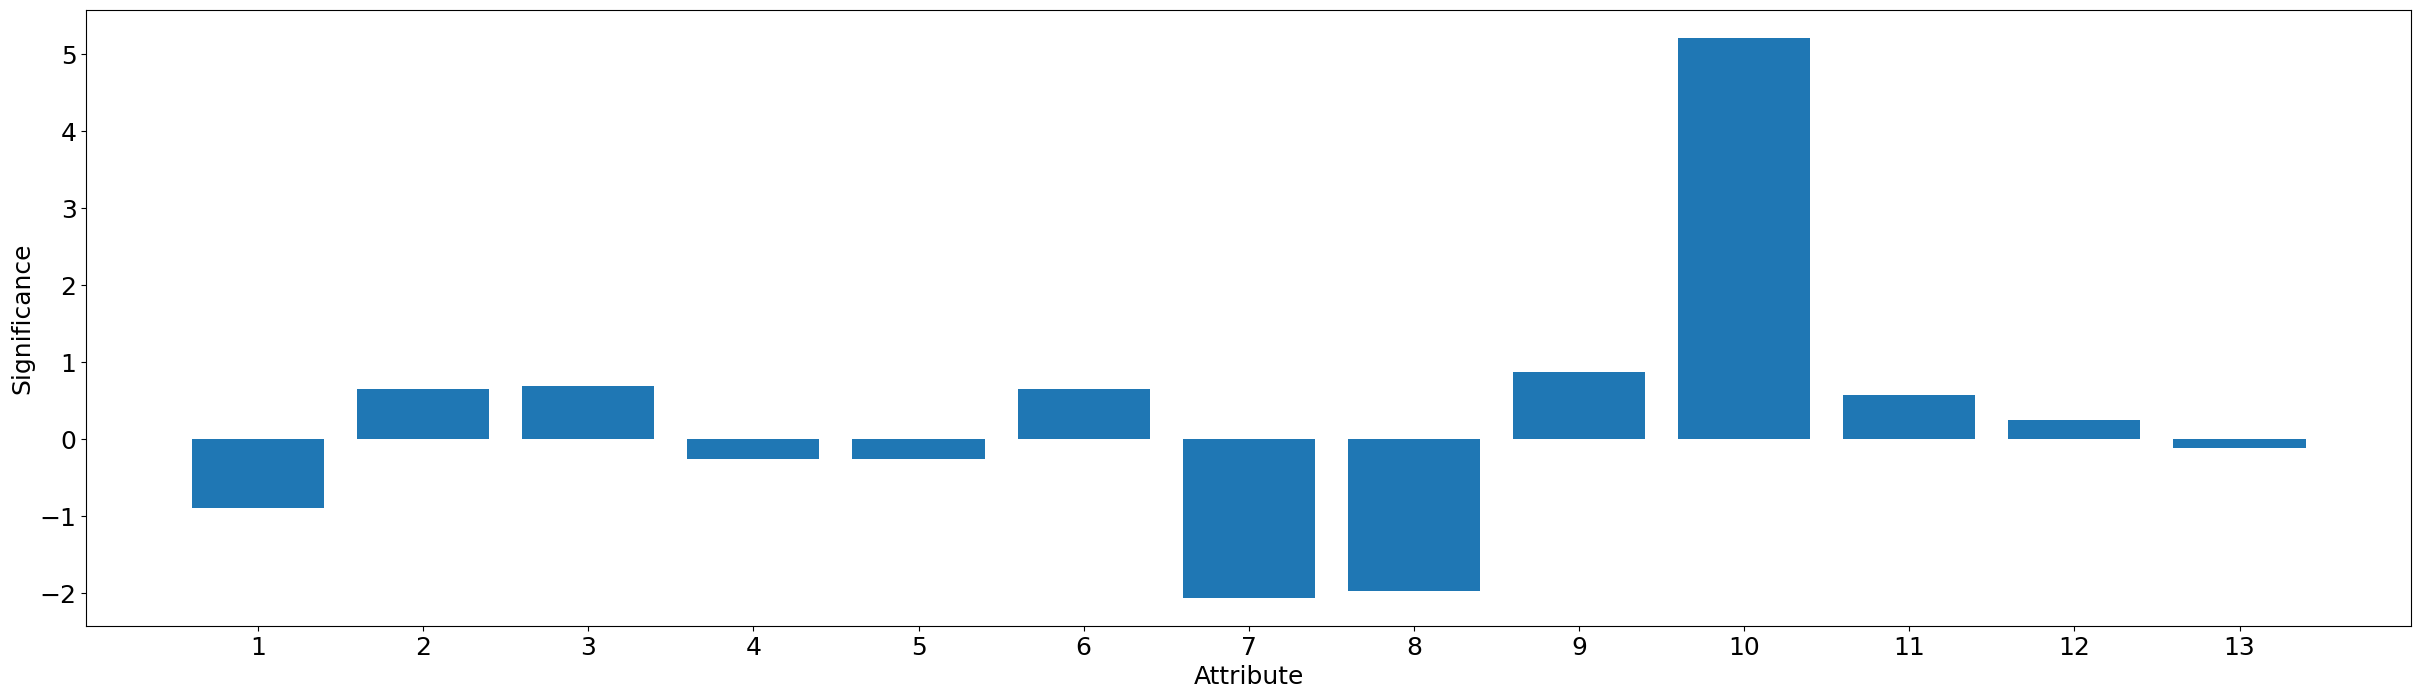

A
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 1.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 1.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 1.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.0000e+00]]
A_mean
[[3.61352356e+00]
 [1.13636364e+01]
 [1.11367787e+01]
 [6.91699605e-02]
 [5.54695059e-01]
 [6.28463439e+00]
 [6.85749012e+01]
 [3.79504269e+00]
 [9.54940711e+00]
 [4.08237154e+02]
 [1.84555336e+01]
 [3.56674032e+02]
 [1.26530632e+01]
 [1.00000000e+00]]
A2
[[-0.41978194  0.28482986 -1.2879095  ...  0.44105193 -1.0755623
   1.        ]
 [-0.41733926 -0.48772236 -0.59338101 ...  0.44105193 -0.49243937
   1.        ]
 [-0.41734159 -0.48772236 -0.59338101 ...  0.39642699 -1.2087274
   1.        ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  0.

In [62]:
A_mean = np.mean(A, axis=0)
A_mean = A_mean.reshape(-1,1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j] / A2std

A2[:,-1] = np.ones(A.shape[0])

U, S, Vt = np.linalg.svd(A2, full_matrices=0)
x = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x) -1) + np.ones(len(x)-1)
plt.bar(x_tick, x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

print("A")
print(A)
print("A_mean")
print(A_mean)
print("A2")
print(A2)
print("U")
print(U)
print("S")
print(S)
print("Vt")
print(Vt)
print("x_tick")
print(x_tick)


Train-Test

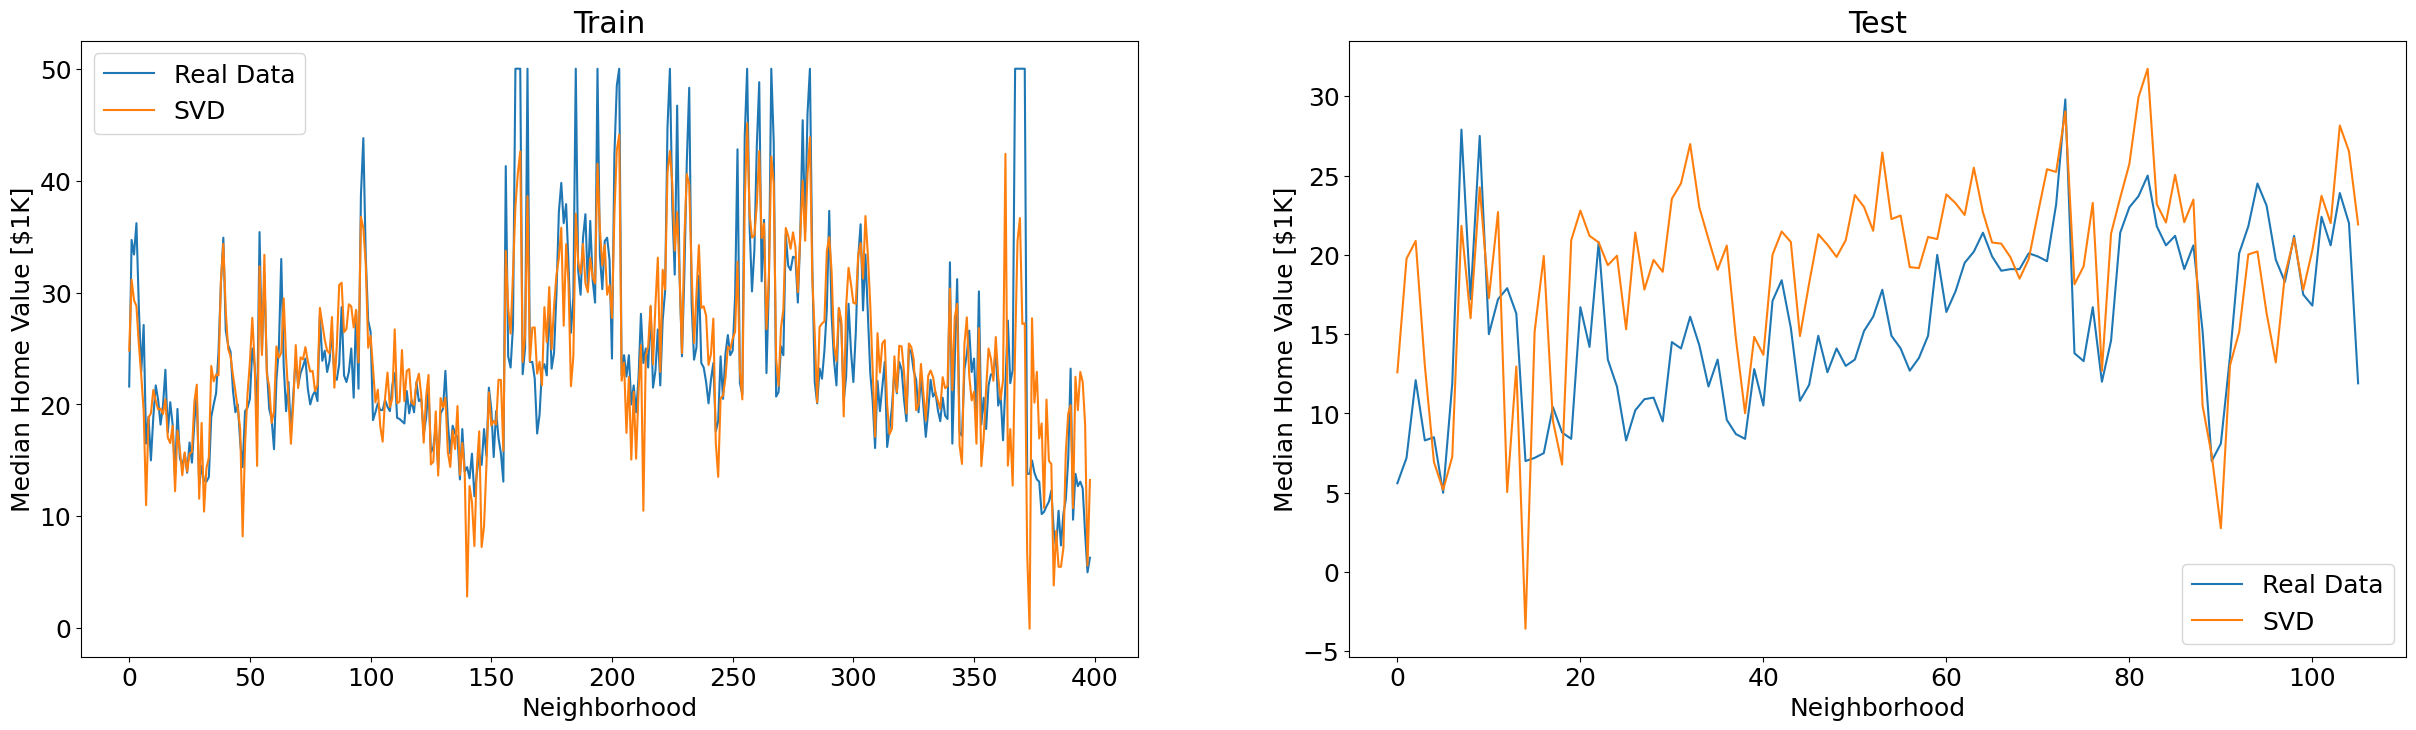

In [76]:
H = np.loadtxt(os.path.join('housing.data')) # Boston House Values (506 houses)
b = H[:,-1] # Housing Value in $1000
A = H[:,:-1] # Other house factors (13)

A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values=1)

n = 400
b_train = b[1:n]
A_train = A[1:n]
b_test = b[n:]
A_test = A[n:]

U, S, Vt = np.linalg.svd(A_train, full_matrices=False)
x = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b_train

fig = plt.figure()

ax1 = fig.add_subplot(121)

plt.plot(b_train, label="Real Data")
plt.plot(A_train @ x, label="SVD")
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1K]')
plt.title('Train')
plt.legend()

ax2 = fig.add_subplot(122)

plt.plot(b_test, label="Real Data")
plt.plot(A_test @ x, label="SVD")
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1K]')
plt.title('Test')
plt.legend()

plt.show()

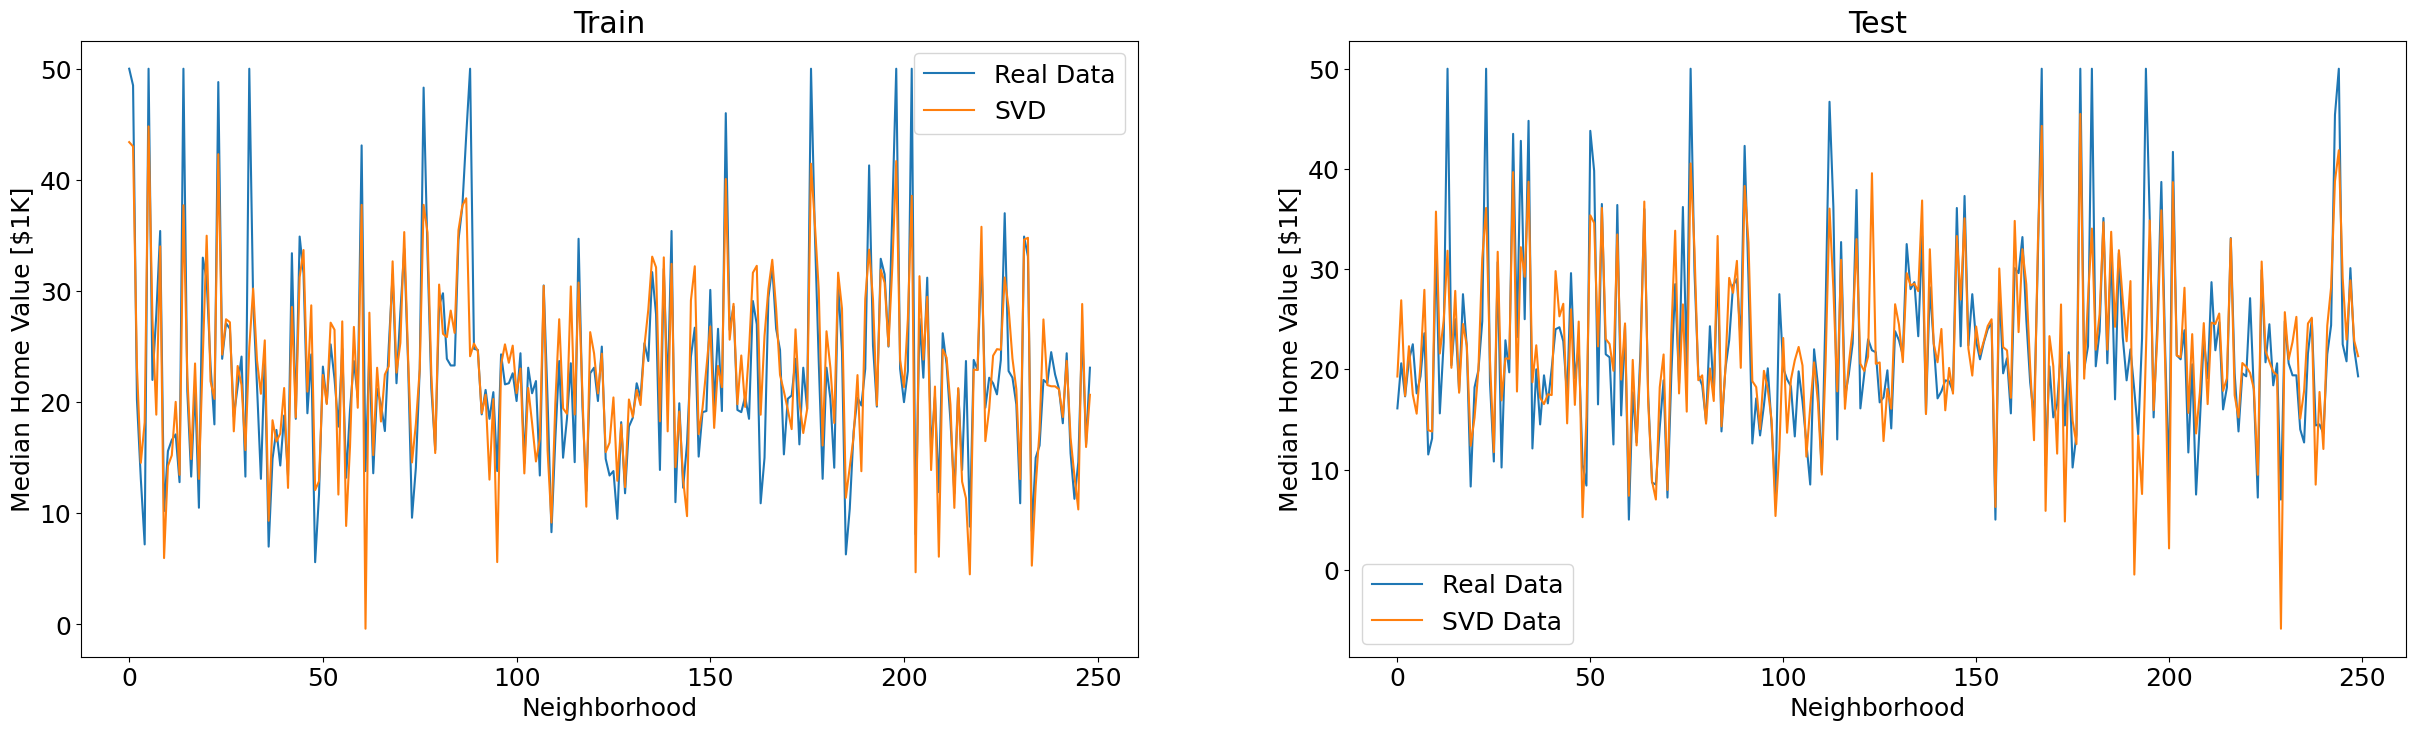

In [77]:
n = 250
p = np.random.permutation(500)
A_random = A[p,:]
b_random = b[p]

b_random_train = b_random[1:n]
A_random_train = A_random[1:n]
b_random_test = b_random[n:]
A_random_test = A_random[n:]

U, S, Vt = np.linalg.svd(A_random_train, full_matrices=False)
x = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b_random_train

fig = plt.figure()

ax1 = fig.add_subplot(121)

plt.plot(b_random_train, label="Real Data")
plt.plot(A_random_train @ x, label="SVD")
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1K]')
plt.title('Train')
plt.legend()

ax2 = fig.add_subplot(122)

plt.plot(b_random_test, label="Real Data")
plt.plot(A_random_test @ x, label="SVD Data")
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1K]')
plt.title('Test')
plt.legend()

plt.show()
